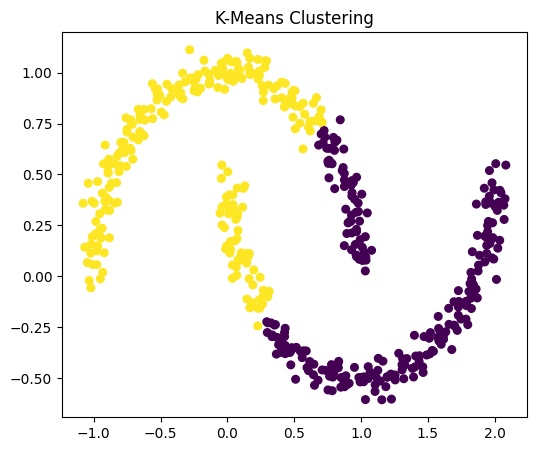

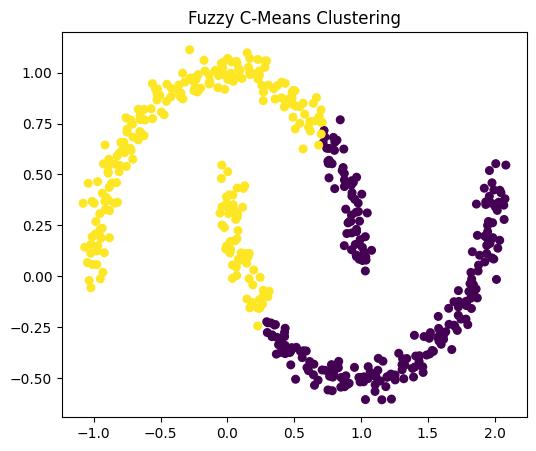

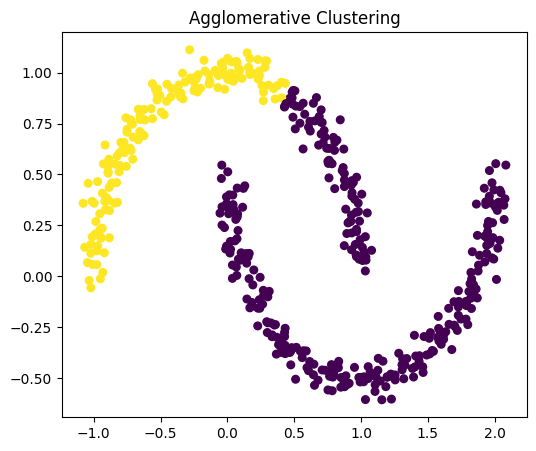

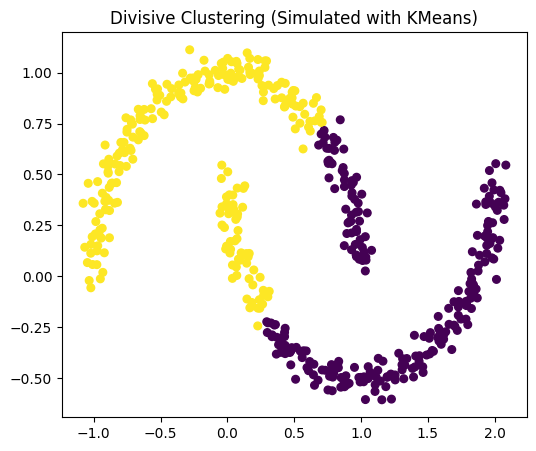

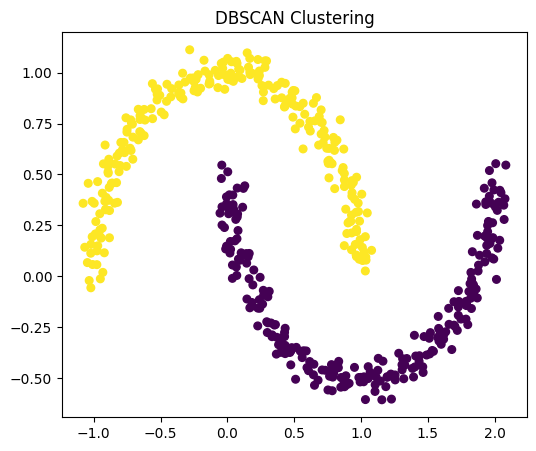

--- Report for K-Means ---
Number of clusters (excluding noise): 2
Cluster 0: 254 samples (50.80%)
Cluster 1: 246 samples (49.20%)


--- Report for Fuzzy C-Means ---
Number of clusters (excluding noise): 2
Cluster 0: 252 samples (50.40%)
Cluster 1: 248 samples (49.60%)


--- Report for Agglomerative ---
Number of clusters (excluding noise): 2
Cluster 0: 341 samples (68.20%)
Cluster 1: 159 samples (31.80%)


--- Report for Divisive (KMeans simulation) ---
Number of clusters (excluding noise): 2
Cluster 0: 254 samples (50.80%)
Cluster 1: 246 samples (49.20%)


--- Report for DBSCAN ---
Number of clusters (excluding noise): 2
Cluster 0: 250 samples (50.00%)
Cluster 1: 250 samples (50.00%)




In [ ]:
# -*- coding: utf-8 -*-
"""
Project: Two Moons Classification - Azad University Assignment
#Machine Learning Regression Project
#Yadegar-Imam University
#Dr S. Abolfazl Hosseini
#Gathered by Arman Forouharfard using Chat-GPT 5
# Year: 2025
# ============================================================
Description:
    - Generate Two Moons dataset
    - Apply each clustering algorithms
    - Visualize the results
    - Print cluster reports
    - Compare performance and robustness
"""

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import skfuzzy as fuzz

# 1) Create the Two Moons dataset (features X and ground-truth labels y used only for coloring/inspection)
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Helper function to plot clustering results
def plot_clusters(X, labels, title):
    """Scatter-plot the points colored by cluster labels."""
    plt.figure(figsize=(6,5))                            # Set figure size
    plt.scatter(X[:,0], X[:,1], c=labels,                # Color points by labels
                cmap='viridis', s=30)                    # Use a colormap and point size
    plt.title(title)                                     # Set plot title
    plt.show()                                           # Display the figure

# ----------- 1. K-Means --------------
k = 2                                                   # Desired number of clusters
# Set n_init='auto' to avoid FutureWarning in newer scikit-learn versions
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42) 
kmeans_labels = kmeans.fit_predict(X)                   # Fit model and get cluster labels
plot_clusters(X, kmeans_labels, "K-Means Clustering")   # Visualize K-Means result

# ----------- 2. Fuzzy C-Means --------------
# skfuzzy expects data as (features x samples), so we transpose X
X_t = X.T                                               # Shape becomes (2, 500)

# Run Fuzzy C-Means:
#  - c: number of clusters
#  - m: fuzziness exponent (m=2 is common; higher => fuzzier memberships)
#  - error: tolerance for stopping criterion
#  - maxiter: maximum number of iterations
# Returns:
#  - cntr: cluster centers
#  - u: final fuzzy membership matrix (shape: c x n_samples)
#  - u0, d, jm, p, fpc: intermediate/diagnostic outputs (not used here)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_t, c=k, m=2, error=0.005, maxiter=1000, init=None
)

# Convert soft memberships to hard labels by taking argmax over clusters
fcm_labels = np.argmax(u, axis=0)
plot_clusters(X, fcm_labels, "Fuzzy C-Means Clustering")

# ----------- 3. Agglomerative Clustering (Hierarchical, bottom-up) --------------
# By default linkage='ward' (works with Euclidean distance and tends to produce compact clusters)
agglo = AgglomerativeClustering(n_clusters=k)
agglo_labels = agglo.fit_predict(X)                     # Fit model and get hard labels
plot_clusters(X, agglo_labels, "Agglomerative Clustering")

# ----------- 4. Divisive Clustering (Hierarchical, top-down) --------------
# sklearn does not provide a direct Divisive implementation.
# A simple simulation is to split the dataset using KMeans into k=2 parts.
# Here we reuse the KMeans result as a proxy for a single top-down split.
div_labels = kmeans_labels                              # Use KMeans labels as a simulated divisive result
plot_clusters(X, div_labels, "Divisive Clustering (Simulated with KMeans)")

# ----------- 5. DBSCAN --------------
# eps: neighborhood radius
# min_samples: minimum number of points required to form a dense region
# DBSCAN assigns label -1 to noise (outliers)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")

# ----------- 6. Print Report --------------
def print_cluster_report(labels, method_name):
    """Print the number of clusters, cluster sizes, and noise count (if any)."""
    print(f"--- Report for {method_name} ---")
    unique_labels, counts = np.unique(labels, return_counts=True)   # Unique cluster IDs and their counts
    # For DBSCAN, label -1 denotes noise; exclude it when counting clusters
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    print(f"Number of clusters (excluding noise): {n_clusters}")
    for label, count in zip(unique_labels, counts):
        if label == -1:                                            # Handle noise label for DBSCAN
            print(f"Noise points: {count}")
        else:
            pct = count / len(labels) * 100
            print(f"Cluster {label}: {count} samples ({pct:.2f}%)")
    print("\n")                                                     # Blank line for readability

# Print a short report for each method
print_cluster_report(kmeans_labels, "K-Means")
print_cluster_report(fcm_labels, "Fuzzy C-Means")
print_cluster_report(agglo_labels, "Agglomerative")
print_cluster_report(div_labels, "Divisive (KMeans simulation)")
print_cluster_report(dbscan_labels, "DBSCAN")
